In [86]:
import pandas as pd

In [87]:
data = 'diabetes.csv'

In [88]:
df = pd.read_csv(data)

In [89]:
df['BMI_Insulin_Ratio'] = df['BMI'] * df['Insulin']
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Insulin_Ratio
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,2641.4
4,0,137,40,35,168,43.1,2.288,33,1,7240.8
5,5,116,74,0,0,25.6,0.201,30,0,0.0
6,3,78,50,32,88,31.0,0.248,26,1,2728.0
7,10,115,0,0,0,35.3,0.134,29,0,0.0
8,2,197,70,45,543,30.5,0.158,53,1,16561.5
9,8,125,96,0,0,0.0,0.232,54,1,0.0


In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Insulin_Ratio
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,2732.532161
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,4218.597846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,761.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,4207.275000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,35564.000000


In [91]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Insulin_Ratio           0
dtype: int64


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Insulin_Ratio         768 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

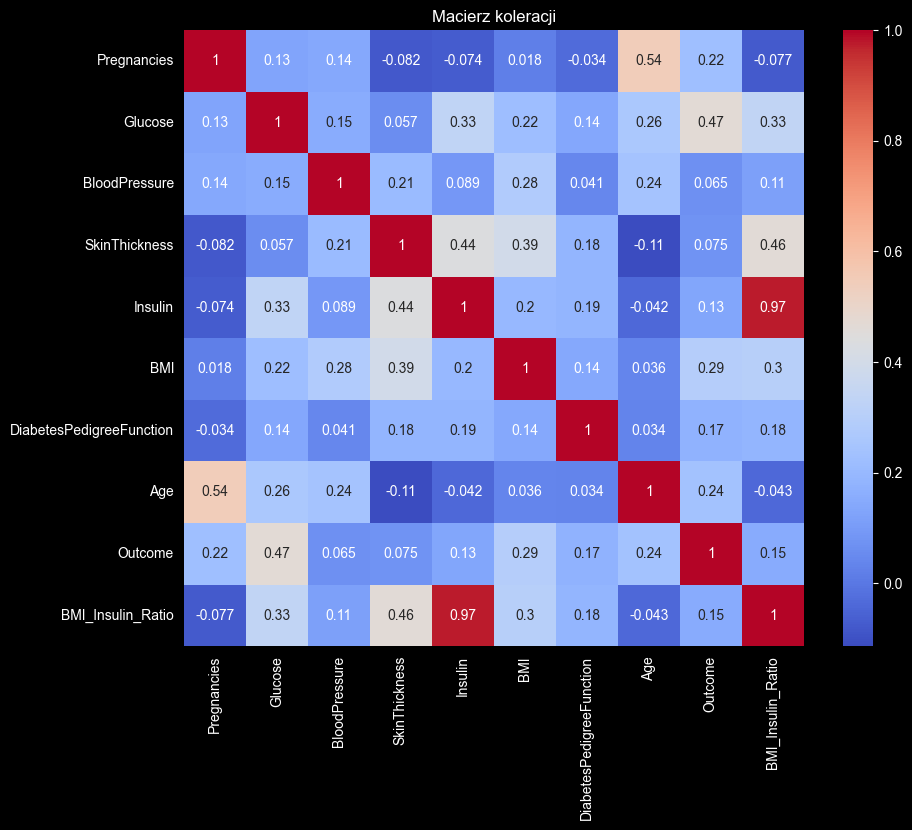

In [94]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Macierz koleracji")
plt.show()

In [95]:
X = df.drop('Outcome', axis=1)

In [96]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Insulin_Ratio'],
      dtype='object')

In [97]:
y = df['Outcome']

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=77)

In [100]:
num_col = X.columns

In [101]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [102]:
from sklearn.compose import ColumnTransformer

In [103]:
transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_col)
])

In [104]:
final_pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier', RandomForestClassifier(random_state=77))
])

In [105]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

In [106]:
grid_search = GridSearchCV(final_pipeline,param_grid=param_grid,n_jobs=-1,cv = 3)

In [107]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Insulin_Ratio'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=77))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]})

In [108]:
print(f'best params: {grid_search.best_params_}')

best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [109]:
print(f'best score: {grid_search.best_score_}')

best score: 0.7654710664753707


In [110]:
y_pred = grid_search.predict(X_test)

In [111]:
from sklearn.metrics import classification_report, accuracy_score

In [112]:
print(f'recall,precision,f1-score:{classification_report(y_test,y_pred)}')
print(f'accuracy:{accuracy_score(y_test,y_pred)}')

recall,precision,f1-score:              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.62      0.59      0.60        49

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

accuracy:0.7532467532467533


In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
num_col1 = X.columns

In [115]:
num_pipeline1 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [116]:
transformer1 = ColumnTransformer(transformers=[
    ('num', num_pipeline1, num_col1)
])

In [117]:
final_pipeline1 = Pipeline(steps=[
    ('transformer', transformer1),
    ('classifier', AdaBoostClassifier(random_state=77))
])

In [118]:
param_grid1 = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0],
    'classifier__estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

In [119]:
grid_search1 = GridSearchCV(final_pipeline1, param_grid=param_grid1, n_jobs=-1, cv=3)

In [120]:
grid_search1.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Insulin_Ratio'],
      dtype='object'))])),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=77))]),
             n_jobs=-1,
             param_grid={'classifier__estimator': [DecisionTreeClassifier(max_depth=1),
                                                   DecisionTreeClassifier(max_depth=2)],
                         'classifier__learning_rate': [0.01, 0.1, 1.0],
                         'classifier__n_estimators': [50, 100, 200]})

In [121]:
grid_search1.best_params_

{'classifier__estimator': DecisionTreeClassifier(max_depth=1),
 'classifier__learning_rate': 1.0,
 'classifier__n_estimators': 100}

In [122]:
y_pred1 = grid_search1.predict(X_test)

In [123]:
print(f'metrics:{classification_report(y_test,y_pred1)}')
print(f'accuracy:{accuracy_score(y_test,y_pred1)}')

metrics:              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.65      0.63      0.64        49

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

accuracy:0.7727272727272727


In [125]:
import numpy as np

In [126]:
def run_simple_tests(df, X_train, y_pred):

    assert 'BMI_Insulin_Ratio' in df.columns, "wrong"
    assert X_train.shape[1] == 9, f"Oczekiwano 9 kolumn, otrzymano {X_train.shape[1]}, blad"



    assert np.all(np.isin(y_pred, [0, 1])), "Model przewiduje wartości spoza zakresu (0 - 1)"

    print("Sukces")


run_simple_tests(df, X_train, y_pred)

Wszystkie testy zakończone sukcesem! (Punkt 9 zaliczony)
